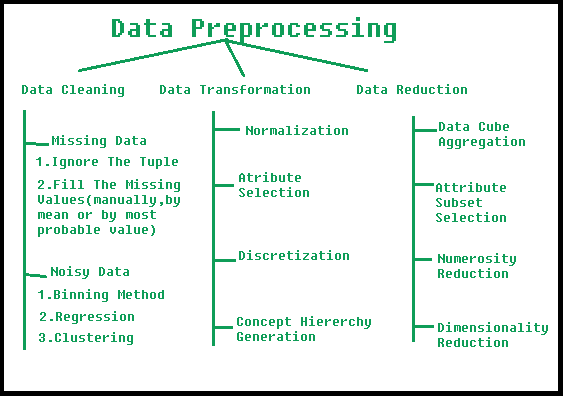

In [17]:
from IPython.display import Image
Image('/home/adish/Downloads/Data-Preprocessing.png')

## Library - set of modules containing functions and classes
eg: import matplotlib.pyplot as plt

here matplotlib --> library name
pyplot-->module inside "matplotlib library" using the "." operator


## importing

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df=pd.read_csv('/home/adish/Desktop/Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [11]:

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## resolving missing data issue

In [12]:
from sklearn.impute import SimpleImputer# inside the library "sklearn",i'm calling "impute" module and in "impute module" ,i'm calling the class "SimpleImputer"
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')#imputer->variable which act as object of the class "SimpleImputer"
#now the object should be connected with matrix of values(input)using the "fit method".
#tranform() method will replace the missing value with the mean values.
imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3]) 
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## encoding[independent variable 'country']

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
x
# France is encoded as 1 0 0
# Spain is encoded as 0 0 1
#Germany is encoded as 0 1 0

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

# encoding[dependent variable 'purchased']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Feature scaling : done to map all the values into a given range.

- standardisation :[range: -3 and +3] #works in most cases [better recommended]

     x'=x-mean(x)/standard deviation
     
     
- Normalisation :[range: 0 and 1] #best when it is having a normal distribution in most of the features

     x'=x-min(x)/max(x)-min(x)
### NEVER APPLY FEATURE SCALING TO DUMMY VARIABLES GENERATED
     
     


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain[:, 3:] = sc.fit_transform(xtrain[:, 3:])
#fit will find the mean and sd and tranform will make the change by applying the equation.
xtest[:, 3:] = sc.transform(xtest[:, 3:])#here we will only apply the transform method bcoz the features of test set need to be scaled by the same scaler that was used on the training set